In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_13'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [3]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [4]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [6]:
df_gross.columns

Index(['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ'],
      dtype='object')

In [33]:
disAvailability = df_gross[['DisTotalTanksEnergyForAvailability_kJ']].dropna()
disAvailability

,DisTotalTanksEnergyForAvailability_kJ
0,80166.107204
1,80141.432179
2,80095.704814
3,80090.528800
4,80017.475276
...,...
471,40570.597193
472,40535.914064
473,40583.990582
474,40536.783892


In [35]:
disEntropy = df_gross[['DisEntropy_kj/K']].dropna()
disEntropy

,DisEntropy_kj/K
0,41.970253
1,47.659192
2,58.083490
3,61.292859
4,66.818207
...,...
471,894.029521
472,873.262510
473,841.317629
474,823.735748


In [54]:

def alltem_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_extraFeatures = df[['flowLoad']]
    df_conc = pd.concat( [df_extraFeatures,df_all],  ignore_index=True, axis =1 )
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    print ('concated is ', df_conc)
    return df_conc 

allTem = alltem_df(df_gross)

concated is                0        1        2        3        4        5        6  \
0       1.32313  27.0880  28.1374  28.8824  29.4920  29.4581  29.4243   
1      -0.25497  27.0880  28.1036  28.8824  29.4920  29.3904  29.6953   
2       2.11217  27.0880  28.1036  28.8824  29.4920  29.4243  29.5598   
3       1.32313  27.0203  28.1036  28.8824  29.4243  29.3904  29.4243   
4       1.32313  27.0542  28.1036  28.8824  29.4581  29.3565  29.5598   
...         ...      ...      ...      ...      ...      ...      ...   
1041  342.98100  22.0148  22.3866  22.5556  22.6570  22.5218  22.8260   
1042  342.98100  22.0486  22.4204  22.5894  22.7246  22.5556  22.8260   
1043  339.82500  22.0148  22.4542  22.5556  22.7246  22.5894  22.8260   
1044  253.81800  22.0486  22.4880  22.5894  22.7246  22.5894  22.8598   
1045  209.63200  22.0148  22.4880  22.5894  22.7246  22.6232  22.8598   

            7        8        9       10  
0     29.4581  29.6275  29.6953  29.3904  
1     29.4581  29.5936  

In [50]:
len_tocut =  len(df_gross) -len(disAvailability)

In [51]:
len_tocut

570

In [75]:
indexed_tem = allTem.iloc[len_tocut:, :].reset_index(drop=True)

In [76]:
indexed_tem

,0,1,2,3,4,5,6,7,8,9,10
0,336.668,38.8536,51.1379,51.4788,52.1267,52.5018,52.6042,52.6383,52.7406,52.8088,52.6724
1,360.340,38.6158,51.0356,51.5129,52.1608,52.4677,52.6383,52.6042,52.7406,52.8429,52.6383
2,393.480,38.5819,50.9334,51.5129,52.2290,52.4677,52.6724,52.6383,52.7406,52.7747,52.6724
3,417.940,38.6837,50.5243,51.4788,52.1608,52.4677,52.6042,52.6383,52.7065,52.8088,52.6383
4,418.729,38.7177,50.1835,51.4106,52.1949,52.5018,52.5700,52.6042,52.7406,52.7747,52.6383
...,...,...,...,...,...,...,...,...,...,...,...
471,342.981,22.0148,22.3866,22.5556,22.6570,22.5218,22.8260,22.7584,23.0964,25.5652,41.6740
472,342.981,22.0486,22.4204,22.5894,22.7246,22.5556,22.8260,22.7922,23.0964,25.5991,41.7079
473,339.825,22.0148,22.4542,22.5556,22.7246,22.5894,22.8260,22.8260,23.0964,25.3623,41.6060
474,253.818,22.0486,22.4880,22.5894,22.7246,22.5894,22.8598,22.8260,23.0964,25.0240,41.1981


In [77]:
df_tem_entropy_conc = pd.concat( [disEntropy,disAvailability ,indexed_tem],  ignore_index=True, axis =1 )

In [78]:
df_tem_entropy_conc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,41.970253,80166.107204,336.668,38.8536,51.1379,51.4788,52.1267,52.5018,52.6042,52.6383,52.7406,52.8088,52.6724
1,47.659192,80141.432179,360.340,38.6158,51.0356,51.5129,52.1608,52.4677,52.6383,52.6042,52.7406,52.8429,52.6383
2,58.083490,80095.704814,393.480,38.5819,50.9334,51.5129,52.2290,52.4677,52.6724,52.6383,52.7406,52.7747,52.6724
3,61.292859,80090.528800,417.940,38.6837,50.5243,51.4788,52.1608,52.4677,52.6042,52.6383,52.7065,52.8088,52.6383
4,66.818207,80017.475276,418.729,38.7177,50.1835,51.4106,52.1949,52.5018,52.5700,52.6042,52.7406,52.7747,52.6383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,894.029521,40570.597193,342.981,22.0148,22.3866,22.5556,22.6570,22.5218,22.8260,22.7584,23.0964,25.5652,41.6740
472,873.262510,40535.914064,342.981,22.0486,22.4204,22.5894,22.7246,22.5556,22.8260,22.7922,23.0964,25.5991,41.7079
473,841.317629,40583.990582,339.825,22.0148,22.4542,22.5556,22.7246,22.5894,22.8260,22.8260,23.0964,25.3623,41.6060
474,823.735748,40536.783892,253.818,22.0486,22.4880,22.5894,22.7246,22.5894,22.8598,22.8260,23.0964,25.0240,41.1981


In [72]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap
scm = create_color_step_obj('jet', 10)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f865a63b790>)

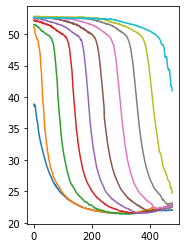

In [82]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(df_tem_entropy_conc, ax, fig, alpha =0.7, scm=None)

In [86]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(df_tem_entropy_conc)
df_nrm = pd.DataFrame(df_nrm)
#df_nrm.columns = chargingIn_df.columns

df_nrm.columns = ['entropy', 'availability', 'flowLoad', 'T0', 'T1', 'T2', 'T3', \
                  'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
df_nrm

,entropy,availability,flowLoad,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,-1.000000,1.000000,0.205985,1.000000,1.000000,0.997735,0.993333,1.000000,0.995575,1.000000,1.00000,0.997575,1.000000
1,-0.989392,0.998758,0.430709,0.972688,0.993095,1.000000,0.995555,0.997797,0.997788,0.997756,1.00000,1.000000,0.994143
2,-0.969954,0.996455,0.745315,0.968794,0.986196,1.000000,1.000000,0.997797,1.000000,1.000000,1.00000,0.995150,1.000000
3,-0.963970,0.996195,0.977520,0.980486,0.958583,0.997735,0.995555,0.997797,0.995575,1.000000,0.99771,0.997575,0.994143
4,-0.953667,0.992516,0.985010,0.984391,0.935579,0.993204,0.997778,1.000000,0.993356,0.997756,1.00000,0.995150,0.994143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.588804,-0.993622,0.265915,-0.934016,-0.940688,-0.923664,-0.927312,-0.936686,-0.936406,-0.966630,-0.99092,-0.939865,-0.889062
472,0.550081,-0.995368,0.265915,-0.930134,-0.938407,-0.921419,-0.922906,-0.934503,-0.936406,-0.964406,-0.99092,-0.937454,-0.883239
473,0.490514,-0.992947,0.235955,-0.934016,-0.936126,-0.923664,-0.922906,-0.932319,-0.936406,-0.962181,-0.99092,-0.954294,-0.900741
474,0.457730,-0.995324,-0.580531,-0.930134,-0.933844,-0.921419,-0.922906,-0.932319,-0.934213,-0.962181,-0.99092,-0.978352,-0.970801


In [92]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), \
                                   m.iloc[i-k:i, :]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys


In [141]:
k =1
n_features = 13
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 2000

In [144]:
X = df_nrm.iloc[:, 3:]
y =df_nrm.iloc[:, 3:]
m = df_nrm[[ 'entropy', 'availability', 'flowLoad']]
y

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1.000000,1.000000,0.997735,0.993333,1.000000,0.995575,1.000000,1.00000,0.997575,1.000000
1,0.972688,0.993095,1.000000,0.995555,0.997797,0.997788,0.997756,1.00000,1.000000,0.994143
2,0.968794,0.986196,1.000000,1.000000,0.997797,1.000000,1.000000,1.00000,0.995150,1.000000
3,0.980486,0.958583,0.997735,0.995555,0.997797,0.995575,1.000000,0.99771,0.997575,0.994143
4,0.984391,0.935579,0.993204,0.997778,1.000000,0.993356,0.997756,1.00000,0.995150,0.994143
...,...,...,...,...,...,...,...,...,...,...
471,-0.934016,-0.940688,-0.923664,-0.927312,-0.936686,-0.936406,-0.966630,-0.99092,-0.939865,-0.889062
472,-0.930134,-0.938407,-0.921419,-0.922906,-0.934503,-0.936406,-0.964406,-0.99092,-0.937454,-0.883239
473,-0.934016,-0.936126,-0.923664,-0.922906,-0.932319,-0.936406,-0.962181,-0.99092,-0.954294,-0.900741
474,-0.930134,-0.933844,-0.921419,-0.922906,-0.932319,-0.934213,-0.962181,-0.99092,-0.978352,-0.970801


In [145]:
Xdf1, ydf1 = prepare_df(X, mhp, y)

In [146]:
Xdf1.shape

(475, 13)

In [147]:

ydf1.shape

(475, 10)

In [148]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [149]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [150]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [151]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [152]:
X_train.shape, y_train.shape

((380, 13), (380, 10))

In [153]:
out_features = y_train.shape[1]

In [159]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(3, input_shape = (time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(Dense(20))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [160]:

model = create_model(k, n_features)
model_fpath=modelDir(ModelName='added_features1.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,                 
                                   mode="min")]

In [ ]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 266 samples, validate on 114 samples
Epoch 1/5000
266/266 [==============================] - 1s 4ms/step - loss: 0.8060 - mean_squared_error: 0.8060 - val_loss: 0.7864 - val_mean_squared_error: 0.7864
Epoch 2/5000
266/266 [==============================] - 0s 129us/step - loss: 0.7985 - mean_squared_error: 0.7985 - val_loss: 0.7848 - val_mean_squared_error: 0.7848
Epoch 3/5000
266/266 [==============================] - 0s 66us/step - loss: 0.7934 - mean_squared_error: 0.7934 - val_loss: 0.7831 - val_mean_squared_error: 0.7831
Epoch 4/5000
266/266 [==============================] - 0s 22us/step - loss: 0.7906 - mean_squared_error: 0.7906 - val_loss: 0.7814 - val_mean_squared_error: 0.7814
Epoch 5/5000
266/266 [==============================] - 0s 21us/step - loss: 0.7838 - mean_squared_error: 0.7838 - val_loss: 0.7798 - val_mean_squared_error: 0.7798
Epoch 6/5000
266/266 [==============================] - 0s 48us/step - loss: 0.7789 - mean_squared_error: 0.7789 - val_loss: 0.77

Epoch 51/5000
266/266 [==============================] - 0s 61us/step - loss: 0.5188 - mean_squared_error: 0.5188 - val_loss: 0.7198 - val_mean_squared_error: 0.7198
Epoch 52/5000
266/266 [==============================] - 0s 49us/step - loss: 0.5107 - mean_squared_error: 0.5107 - val_loss: 0.7187 - val_mean_squared_error: 0.7187
Epoch 53/5000
266/266 [==============================] - 0s 46us/step - loss: 0.5020 - mean_squared_error: 0.5020 - val_loss: 0.7175 - val_mean_squared_error: 0.7175
Epoch 54/5000
266/266 [==============================] - 0s 45us/step - loss: 0.4956 - mean_squared_error: 0.4956 - val_loss: 0.7164 - val_mean_squared_error: 0.7164
Epoch 55/5000
266/266 [==============================] - 0s 69us/step - loss: 0.4935 - mean_squared_error: 0.4935 - val_loss: 0.7153 - val_mean_squared_error: 0.7153
Epoch 56/5000
266/266 [==============================] - 0s 113us/step - loss: 0.4819 - mean_squared_error: 0.4819 - val_loss: 0.7141 - val_mean_squared_error: 0.7141
Epo

Epoch 101/5000
266/266 [==============================] - 0s 27us/step - loss: 0.2649 - mean_squared_error: 0.2649 - val_loss: 0.6747 - val_mean_squared_error: 0.6747
Epoch 102/5000
266/266 [==============================] - 0s 29us/step - loss: 0.2537 - mean_squared_error: 0.2537 - val_loss: 0.6735 - val_mean_squared_error: 0.6735
Epoch 103/5000
266/266 [==============================] - 0s 77us/step - loss: 0.2575 - mean_squared_error: 0.2575 - val_loss: 0.6722 - val_mean_squared_error: 0.6722
Epoch 104/5000
266/266 [==============================] - 0s 41us/step - loss: 0.2432 - mean_squared_error: 0.2432 - val_loss: 0.6708 - val_mean_squared_error: 0.6708
Epoch 105/5000
266/266 [==============================] - 0s 30us/step - loss: 0.2491 - mean_squared_error: 0.2491 - val_loss: 0.6693 - val_mean_squared_error: 0.6693
Epoch 106/5000
266/266 [==============================] - 0s 79us/step - loss: 0.2438 - mean_squared_error: 0.2438 - val_loss: 0.6678 - val_mean_squared_error: 0.667

266/266 [==============================] - 0s 161us/step - loss: 0.1512 - mean_squared_error: 0.1512 - val_loss: 0.5652 - val_mean_squared_error: 0.5652
Epoch 151/5000
266/266 [==============================] - 0s 114us/step - loss: 0.1454 - mean_squared_error: 0.1454 - val_loss: 0.5628 - val_mean_squared_error: 0.5628
Epoch 152/5000
266/266 [==============================] - 0s 86us/step - loss: 0.1549 - mean_squared_error: 0.1549 - val_loss: 0.5604 - val_mean_squared_error: 0.5604
Epoch 153/5000
266/266 [==============================] - 0s 102us/step - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.5581 - val_mean_squared_error: 0.5581
Epoch 154/5000
266/266 [==============================] - 0s 139us/step - loss: 0.1408 - mean_squared_error: 0.1408 - val_loss: 0.5558 - val_mean_squared_error: 0.5558
Epoch 155/5000
266/266 [==============================] - 0s 142us/step - loss: 0.1449 - mean_squared_error: 0.1449 - val_loss: 0.5536 - val_mean_squared_error: 0.5536
Epoch 15

In [157]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)

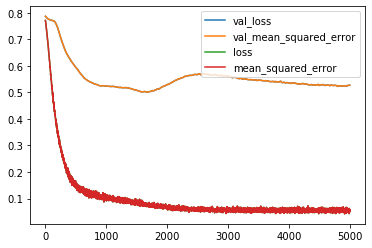

In [158]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()


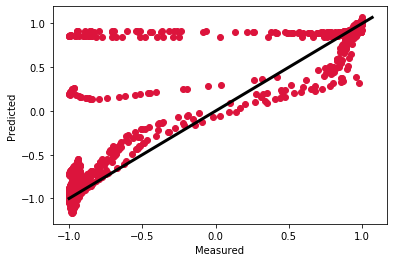

In [135]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


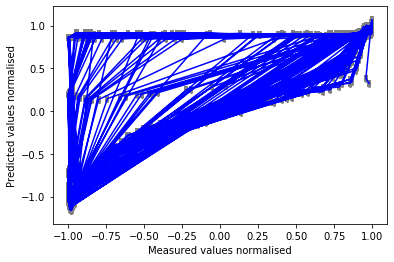

In [136]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [123]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat_copy_df, scaler), unscale(y_test_copy_df, scaler)



NameError: name 'yhat_copy_df' is not defined